In [83]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle

In [84]:
path = 'C:/Users/Sakshee/Documents/PyCharm Data/Numbers'
imageDimensions = (32, 32, 3)         

In [85]:
images = []   # contains all images
classNo = []  # contains corresponding class Id of images

myList = os.listdir(path)                               # list containing the names of the folders
print("Total Classes Detected:", len(myList))           # =10 since we have folders from number 0 to 9
noOfClasses = len(myList)

Total Classes Detected: 10


In [86]:
for x in range(0, noOfClasses):                         # x represents the number for each class
    myPicList = os.listdir(path + "/" + str(x))         # my picList takes us into each folder and so we can read the images next

    for y in myPicList:                                 # y represents each picture in a particular folder
        curImg = cv2.imread(path + "/" + str(x) + "/" + y)
        curImg = cv2.resize(curImg, (imageDimensions[0],imageDimensions[1]))
        images.append(curImg)
        classNo.append(x)
    print(x, end = " ")                                 # so that folder Ids get printed in the same horizontal line
    
print(" ")
print("Total Images in Images List = ",len(images))
print("Total IDS in classNo List= ",len(classNo))

0 1 2 3 4 5 6 7 8 9  
Total Images in Images List =  10160
Total IDS in classNo List=  10160


In [87]:
images = np.array(images)
classNo = np.array(classNo)
print(images.shape)
print(classNo.shape)

(10160, 32, 32, 3)
(10160,)


In [88]:
testRatio = 0.2             
valRatio = 0.2

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)

# Splitting validation data from the previously split train data
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=valRatio)
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(6502, 32, 32, 3)
(2032, 32, 32, 3)
(1626, 32, 32, 3)


In [89]:
print(np.where(y_train == 0))
print(len(np.where(y_train == 0)[0]))

(array([   7,   10,   13,   46,   47,   52,   60,   64,   84,   85,   91,
         93,   99,  103,  111,  116,  140,  143,  169,  170,  175,  196,
        204,  206,  221,  229,  251,  260,  273,  295,  306,  307,  315,
        317,  334,  344,  347,  361,  401,  404,  424,  439,  452,  456,
        474,  478,  482,  496,  498,  513,  514,  521,  531,  533,  549,
        551,  564,  577,  586,  597,  602,  614,  620,  621,  632,  635,
        641,  656,  658,  661,  677,  690,  692,  719,  733,  748,  754,
        762,  768,  783,  810,  814,  824,  845,  848,  865,  867,  872,
        890,  894,  899,  921,  924,  929,  938,  941,  953,  987,  989,
        993, 1015, 1031, 1035, 1038, 1043, 1068, 1103, 1110, 1124, 1126,
       1127, 1135, 1138, 1150, 1165, 1196, 1199, 1205, 1212, 1219, 1220,
       1243, 1244, 1247, 1260, 1267, 1278, 1290, 1299, 1311, 1340, 1358,
       1367, 1380, 1398, 1399, 1402, 1411, 1430, 1448, 1455, 1456, 1476,
       1477, 1479, 1498, 1506, 1507, 1509, 1524, 1

[633, 647, 656, 668, 638, 656, 670, 641, 639, 654]


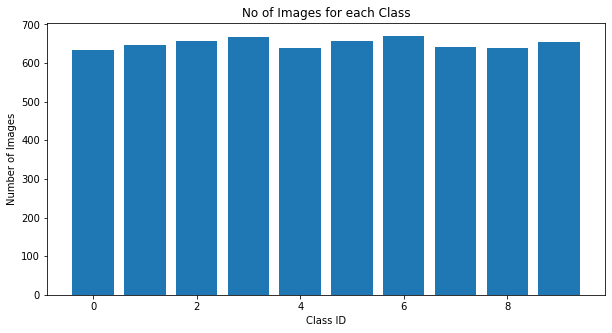

In [90]:
# Visualisation of data
numOfSamples = []

for x in range(0, noOfClasses):
    # print(len(np.where(y_train==x)[0]))
    numOfSamples.append(len(np.where(y_train == x)[0]))
print(numOfSamples)

plt.figure(figsize=(10, 5))
plt.bar(range(0, noOfClasses), numOfSamples)
plt.title("No of Images for each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

In [91]:
def preProcessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)                        # makes the lighting of image distribute evenly
    img = img / 255
    return img

In [92]:
# pre-training visualisation of dataset
img_test = preProcessing(X_train[10])
img_test = cv2.resize(img_test, (300,300))
cv2.imshow("image", img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [93]:
# map function helps to run a function over an array or a list
# map(preProcessing, X_train) will send each element of X_train to preProcessing and return a list which we need to store as
# a numpy array X_train

X_train = np.array(list(map(preProcessing, X_train)))
X_test = np.array(list(map(preProcessing, X_test)))
X_validation = np.array(list(map(preProcessing, X_validation)))

In [94]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)

In [95]:
# To create/ augment images
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
dataGen.fit(X_train)

In [96]:
# one-hot encoding
y_train = to_categorical(y_train, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)

In [97]:
print(y_train)
print(y_train.shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(6502, 10)


In [98]:
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5, 5)
    sizeOfFilter2 = (3, 3)
    sizeOfPool = (2, 2)
    noOfNodes = 500

    model = Sequential()
    model.add((Conv2D(noOfFilters, sizeOfFilter1, input_shape=(imageDimensions[0],imageDimensions[1], 1), activation='relu')))
    model.add((Conv2D(noOfFilters, sizeOfFilter1, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add((Conv2D(noOfFilters // 2, sizeOfFilter2, activation='relu')))
    model.add((Conv2D(noOfFilters // 2, sizeOfFilter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(noOfNodes, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses, activation='softmax'))

    model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


model = myModel()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 30)         

In [99]:
batchSizeVal = 50
epochsVal = 2                  # training on just 2 epochs to save computaional time (ideally use around 10 epochs)
stepsPerEpochVal = 2000

history = model.fit_generator(dataGen.flow(X_train, y_train,
                                           batch_size=batchSizeVal),
                                           steps_per_epoch=stepsPerEpochVal,
                                           epochs=epochsVal,
                                           validation_data=(X_validation, y_validation),
                                           shuffle=1)

Epoch 1/2
2000/2000 [==============================] - 653s 327ms/step - loss: 0.2495 - accuracy: 0.9173 - val_loss: 0.0178 - val_accuracy: 0.9951
Epoch 2/2
2000/2000 [==============================] - 1459s 729ms/step - loss: 0.0728 - accuracy: 0.9772 - val_loss: 0.0179 - val_accuracy: 0.9951


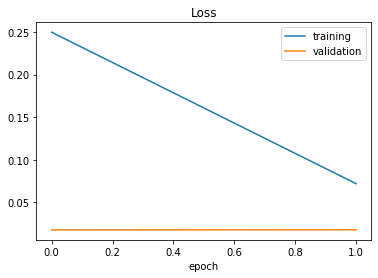

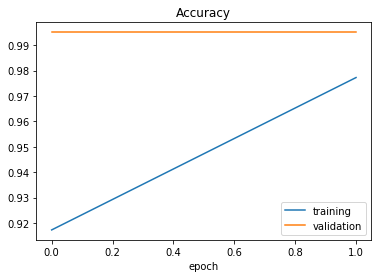

In [100]:
# Plotting the results
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [101]:
# Evaluating testing images
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score = ', score[0])
print('Test Accuracy =', score[1])

Test Score =  0.015091616830560936
Test Accuracy = 0.9965550899505615


In [102]:
# saving the trained model as a pickle object
pickle_out = open("model_trained.p", "wb")        # wb is write the bytes
pickle.dump(model, pickle_out)
pickle_out.close()